In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('network_data.csv')

df

,Packet Size,Error Number,Session Duration,Protocol Number
0,726,4,41,235
1,1141,5,76,236
2,725,7,35,70
3,1428,9,101,143
4,1404,4,78,1
...,...,...,...,...
195,784,4,97,127
196,680,1,31,73
197,1625,8,36,164
198,898,1,86,133


In [25]:
# To indicate the parameters, the correlation coefficient is calculated using the Pearson method
corre_matrix = df.corr(method='pearson')
corre_matrix

,Packet Size,Error Number,Session Duration,Protocol Number
Packet Size,1.000000,0.028770,-0.130087,0.032864
Error Number,0.028770,1.000000,-0.083144,0.129160
Session Duration,-0.130087,-0.083144,1.000000,-0.019251
Protocol Number,0.032864,0.129160,-0.019251,1.000000


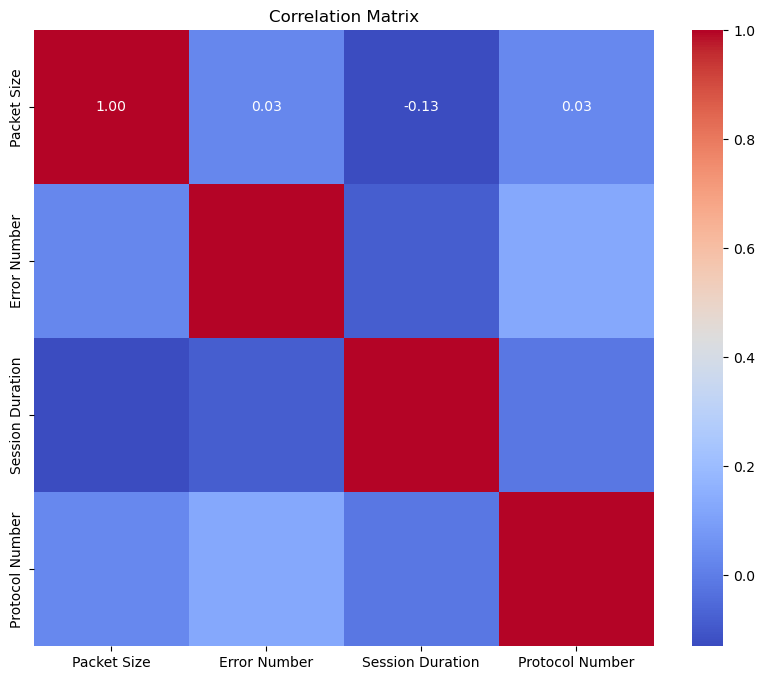

In [26]:
# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corre_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")

# Save the heatmap as a PDF file
plt.savefig("correlation_matrix.pdf", format='pdf', bbox_inches='tight')
plt.show()

In [28]:
correlation_values = corre_matrix.unstack()
sorted_correlation_values = correlation_values.sort_values(ascending=False)
highest_correlation = sorted_correlation_values[sorted_correlation_values < 1].head(2)

# Extract the names of the two features with the highest correlation
feature1 = highest_correlation.index[0][0]
feature2 = highest_correlation.index[0][1]

try:
    with open('highest_correlation.pdf', 'w') as f:
        f.write(f'Two features with the highest correlation: {feature1} and {feature2}')
    print("Successfully saved 'highest_correlation.pdf'.")
except Exception as e:
    print("Error saving 'highest_correlation.pdf':", e)

Successfully saved 'highest_correlation.pdf'.
